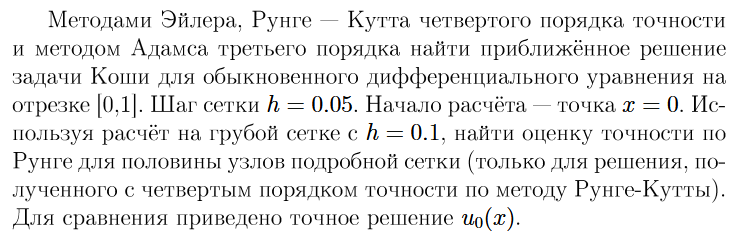

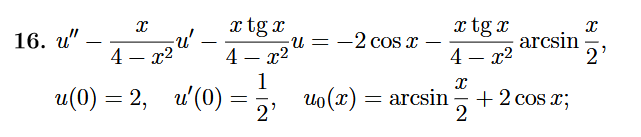

\begin{aligned}

u = u_1, v = u'

\end{aligned}

\begin{aligned}

u' = v

\end{aligned}

\begin{aligned}

v' = \frac{x}{4 - x^2}v + \frac{x \tan(x)}{4 - x^2}u - 2\cos(x) - \frac{x \tan(x)}{4 - x^2} \arcsin\left(\frac{x}{2}\right)

\end{aligned}
#### Такая ужасная система выйдет

\begin{aligned}
u_1' &= u_2 \\
u_2' &= \frac{x}{4 - x^2} u_2 + \frac{x \tan(x)}{4 - x^2} u_1 - 2 \cos(x) - \frac{x \tan(x)}{4 - x^2} \arcsin\left(\frac{x}{2}\right)
\end{aligned}


#### О чем собственно речь:
Определим нашу ф-цию как вектор

\begin{aligned}
\mathbf{y} = [u_1, u_2]^T.
\end{aligned}

\begin{aligned}

\mathbf{y}' = \mathbf{F}(x, \mathbf{y}) = \begin{bmatrix}
u_2 \\
\frac{x}{4 - x^2} u_2 + \frac{x \tan(x)}{4 - x^2} u_1 - 2 \cos(x) - \frac{x \tan(x)}{4 - x^2} \arcsin\left(\frac{x}{2}\right)
\end{bmatrix}

\end{aligned}


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Просто нужные импорты

def exact_solution(x):
    return np.arcsin(x / 2) + 2 * np.cos(x)
# Само решение

def F(x, y):
    u = y[0]
    v = y[1]
    
    if (4 - x**2) == 0:
        raise ValueError(f"Division by zero encountered at x = {x}")
    
    a = x / (4 - x**2)
    b = x * np.tan(x) / (4 - x**2)
    c = -2 * np.cos(x) - (x * np.tan(x) / (4 - x**2)) * np.arcsin(x / 2)
    
    du_dx = v
    dv_dx = a * v + b * u + c
    
    return np.array([du_dx, dv_dx])
# Тот ужасный вектор, который сам является системой, но что хорошо так то что в нем ОДУ I порядка

y0 = [2, 0.5]  # [u(0), u'(0)]
x0 = 0
xf = 1
hs = 0.05
hl = 0.1

In [44]:
def euler(F, y0, x0, xf, h):
    N = int((xf - x0) / h)
    xs = np.linspace(x0, xf, N + 1)
    ys = np.zeros((N + 1, len(y0)))
    ys[0] = y0
    
    for i in range(N):
        ys[i + 1] = ys[i] + h * F(xs[i], ys[i])

    return xs, ys
# Смысл метода в том, что мы принимаем, что значение ф-ции в точке x+h равно значению ф-ции в точке
# x плюс произведение производной на шаг h. Это работает потому что производная как раз задает
# направление, а малость шага позволяет лучше аппроксимировать.

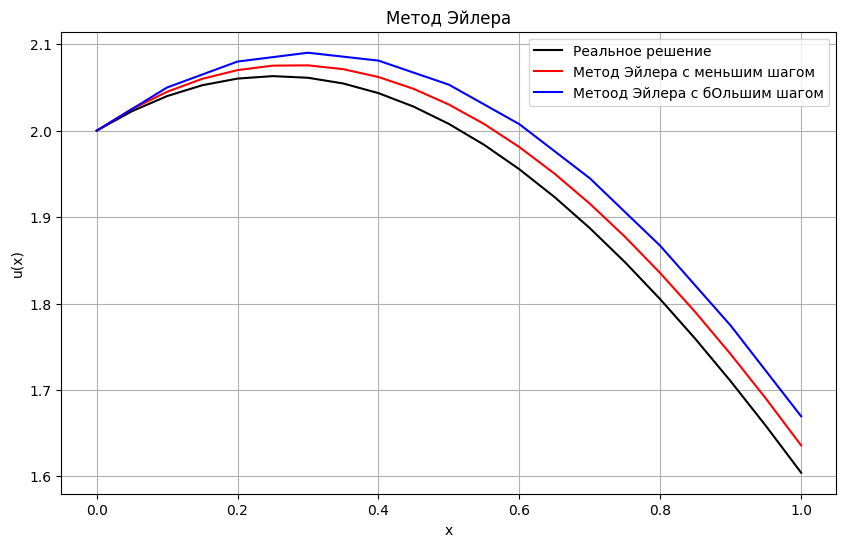

In [52]:
xs_euler, ys_euler = euler(F, y0, x0, xf, hs)
xl_euler, yl_euler = euler(F, y0, x0, xf, hl)

def exact_solution(x):
    return np.arcsin(x / 2) + 2 * np.cos(x)

exact = exact_solution(xs_euler)

plt.figure(figsize=(10, 6))
plt.plot(xs_euler, exact, 'k-', label='Реальное решение')
plt.plot(xs_euler, ys_euler[:, 0], 'r-', label="Метод Эйлера с меньшим шагом")
plt.plot(xl_euler, yl_euler[:, 0], 'b-', label="Метоод Эйлера с бОльшим шагом")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title("Метод Эйлера")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
def rk4(F, y0, x0, xf, h):
    N = int((xf - x0) / h)
    xs = np.linspace(x0, xf, N + 1)
    ys = np.zeros((N + 1, len(y0)))
    ys[0] = y0 

    for i in range(N):
        k1 = F(xs[i], ys[i])
        k2 = F(xs[i] + h / 2, ys[i] + h * k1 / 2)
        k3 = F(xs[i] + h / 2, ys[i] + h * k2 / 2)
        k4 = F(xs[i] + h, ys[i] + h * k3)
        ys[i + 1] = ys[i] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

    return xs, ys
# Смысл этого метода в том, что мы делаем примерно так же как и в методе Эйлера, но с небольшими
# поправками, чтобы получить более точный результат. А имеено: мы делим наш отрезок h на 4 части, и
# на каждой из них мы считаем значение функции, а потом уже находим значение функции, зная эти 4
# значения. Это позволяет аппрооксимировать функцию с большей точностью т.к. вместо одной точки мы 
# имеем одну и еще 3 "мнимые", которые тем не менее учитываются.

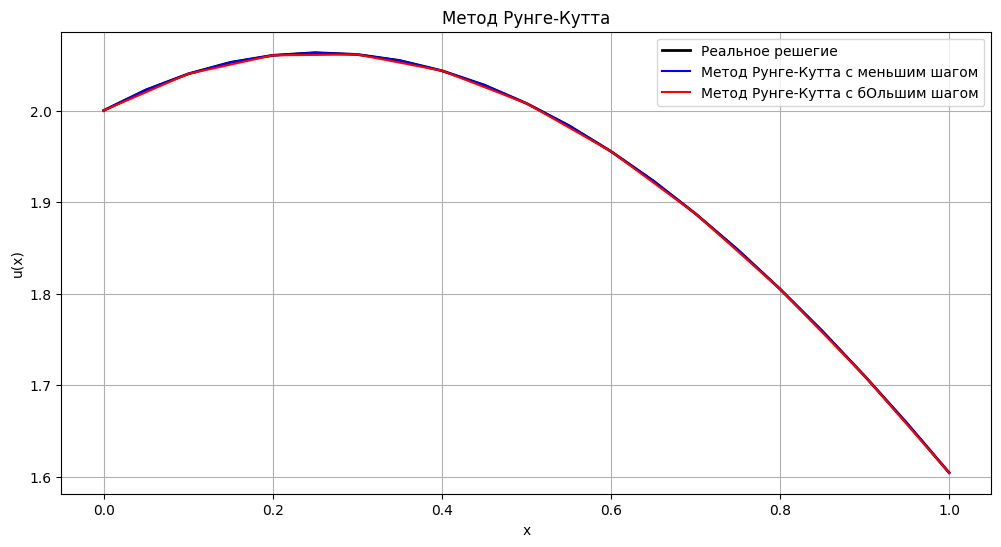

In [53]:
xs_rk4, ys_rk4 = rk4(F, y0, x0, xf, hs)
xl_rk4, yl_rk4 = rk4(F, y0, x0, xf, hl)

exact = exact_solution(xs_rk4)

plt.figure(figsize=(12, 6))
plt.plot(xs_rk4, exact, 'k-', label='Реальное решегие', linewidth=2)
plt.plot(xs_rk4, ys_rk4[:, 0], 'b-', label='Метод Рунге-Кутта с меньшим шагом')
plt.plot(xl_rk4, yl_rk4[:, 0], 'r-', label='Метод Рунге-Кутта с бОльшим шагом')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Метод Рунге-Кутта')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
def adams_bashforth_3(F, y0, x0, xf, h):    
    N = int((xf - x0) / h)
    xs = np.linspace(x0, xf, N + 1)
    ys = np.zeros((N + 1, len(y0)))
    ys[0] = y0

    for i in range(2):
        k1 = F(xs[i], ys[i])
        k2 = F(xs[i] + h / 2, ys[i] + h * k1 / 2)
        k3 = F(xs[i] + h / 2, ys[i] + h * k2 / 2)
        k4 = F(xs[i] + h, ys[i] + h * k3)
        ys[i + 1] = ys[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    f_n_minus_2 = F(xs[0], ys[0])
    f_n_minus_1 = F(xs[1], ys[1])
    
    for i in range(2, N):
        f_n = F(xs[i], ys[i])
        
        ys[i + 1] = ys[i] + h * (23*f_n - 16*f_n_minus_1 + 5*f_n_minus_2) / 12
        
        f_n_minus_2 = f_n_minus_1
        f_n_minus_1 = f_n
    
    return xs, ys

# А тут как раз смысл в том, что мы уже имеем 2 дополнительные реальные точки кроме текущей. И все 3
# учитываются в формуле.

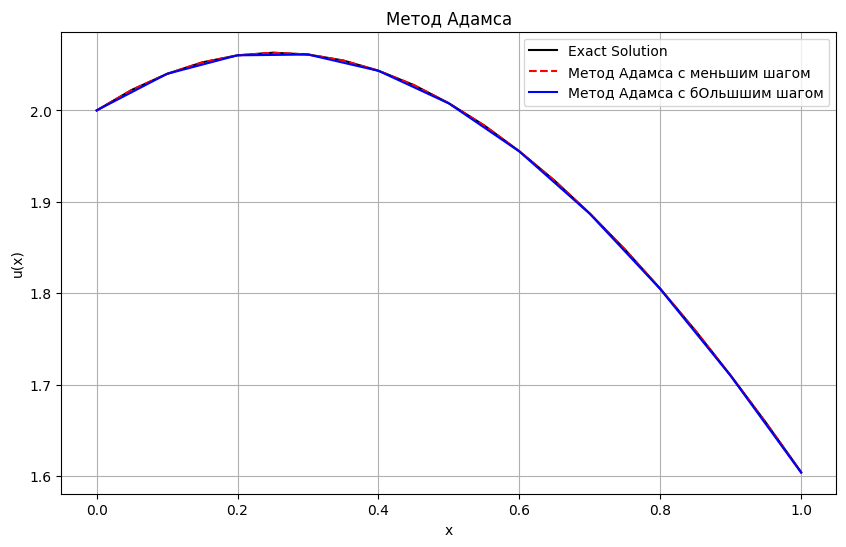

In [55]:
xs_ab3, ys_ab3 = adams_bashforth_3(F, y0, x0, xf, hs)
xl_ab3, yl_ab3 = adams_bashforth_3(F, y0, x0, xf, hl)
exact = exact_solution(xs_ab3)
    
plt.figure(figsize=(10, 6))
plt.plot(xs_ab3, exact, 'k-', label='Exact Solution')
plt.plot(xs_ab3, ys_ab3[:, 0], 'r--', label='Метод Адамса с меньшим шагом')
plt.plot(xl_ab3, yl_ab3[:, 0], 'b-', label='Метод Адамса с бОльшшим шагом')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Метод Адамса')
plt.legend()
plt.grid(True)
plt.show()


Таблица ошибок:
  x  Теоретическая ошибка  Реальная ошибка
0.0          0.000000e+00     0.000000e+00
0.1          1.244457e-10     1.540603e-10
0.2          1.359638e-10     1.943419e-10
0.3          6.023442e-11     1.447837e-10
0.4         -6.652889e-11     3.958611e-11
0.5         -1.938065e-10     7.319478e-11
0.6         -2.506933e-10     1.258005e-10
0.7         -1.354146e-10     2.061529e-11
0.8          3.038046e-10     3.884864e-10
0.9          1.305696e-09     1.332405e-09
1.0          3.272099e-09     3.202010e-09


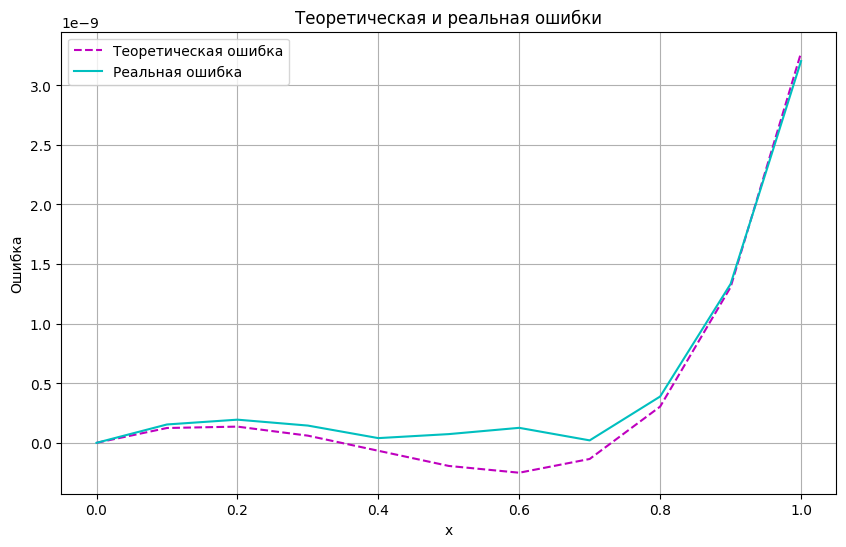

In [57]:
exact_coarse = exact_solution(xl_rk4)

ys_rk4_at_coarse = ys_rk4[::2, 0]

estimated_error_rk4 = (ys_rk4_at_coarse - yl_rk4[:, 0]) / 15

actual_error_rk4 = np.abs(ys_rk4_at_coarse - exact_coarse)

data_errors = {
    'x': xl_rk4,
    'Теоретическая ошибка': estimated_error_rk4,
    'Реальная ошибка': actual_error_rk4
}

df_errors = pd.DataFrame(data_errors)

print("\nТаблица ошибок:")
print(df_errors.to_string(index=False))

plt.figure(figsize=(10,6))
plt.plot(xl_rk4, estimated_error_rk4, 'm--', label="Теоретическая ошибка")
plt.plot(xl_rk4, actual_error_rk4, 'c-', label='Реальная ошибка')
plt.xlabel('x')
plt.ylabel('Ошибка')
plt.title('Теоретическая и реальная ошибки')
plt.legend()
plt.grid(True)
plt.show()